# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd 
train = pd.read_csv("C:/Users/Arshadali Shaikh/Downloads/training_set (1).csv")
test = pd.read_csv("C:/Users/Arshadali Shaikh/Downloads/testing_set.csv")

In [2]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Missing Data treatment

In [3]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# there are many values which contains NA which uses as a shortform so i have fill the rows with that original name

In [4]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")


In [5]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")


In [6]:
def replacer(df):
    for i in df.columns:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i]=df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i]=df[i].fillna(x)

In [7]:
replacer(train)
replacer(test)   

In [8]:
train.isna().sum()  #removed missing values.

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# EDA

In [9]:
Y = train[["SalePrice"]]
X = train.drop(labels=["Id","SalePrice"],axis=1)
from PM8 import ANOVA
train.corr()["SalePrice"].sort_values()  #find out the correlation of the column and then sorted

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [10]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,4,2010,WD,Normal


In [11]:
for i in train.columns:
    if(train[i].dtypes == "object"):
        print("SalePrice vs ",i,":---->",ANOVA(train,i,"SalePrice"))  
        
# find the pvalues to know the statiscally feature importance for target varaible by usnig Anova Function. 
        

SalePrice vs  MSZoning :----> 0.0
SalePrice vs  Street :----> 0.117
SalePrice vs  Alley :----> 0.0
SalePrice vs  LotShape :----> 0.0
SalePrice vs  LandContour :----> 0.0
SalePrice vs  Utilities :----> 0.585
SalePrice vs  LotConfig :----> 0.0
SalePrice vs  LandSlope :----> 0.141
SalePrice vs  Neighborhood :----> 0.0
SalePrice vs  Condition1 :----> 0.0
SalePrice vs  Condition2 :----> 0.043
SalePrice vs  BldgType :----> 0.0
SalePrice vs  HouseStyle :----> 0.0
SalePrice vs  RoofStyle :----> 0.0
SalePrice vs  RoofMatl :----> 0.0
SalePrice vs  Exterior1st :----> 0.0
SalePrice vs  Exterior2nd :----> 0.0
SalePrice vs  MasVnrType :----> 0.0
SalePrice vs  ExterQual :----> 0.0
SalePrice vs  ExterCond :----> 0.0
SalePrice vs  Foundation :----> 0.0
SalePrice vs  BsmtQual :----> 0.0
SalePrice vs  BsmtCond :----> 0.0
SalePrice vs  BsmtExposure :----> 0.0
SalePrice vs  BsmtFinType1 :----> 0.0
SalePrice vs  BsmtFinType2 :----> 0.0
SalePrice vs  Heating :----> 0.001
SalePrice vs  HeatingQC :----> 0.0
Sa

In [12]:
X = X.drop(labels=["Street","Utilities"],axis=1) # no importance features so dropped.

In [13]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,No alley access,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,No alley access,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,No Pool,MnPrv,None,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,No alley access,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,No alley access,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,No Pool,No Fence,None,0,4,2010,WD,Normal


# Preprocessing

In [14]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

Xnew = preprocessing(X)   #preprocessed the data to make data in a same scale.
    

In [15]:
Xnew

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0,0,0,1,0,0,0,0,1,0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0,0,0,1,0,0,0,0,1,0


# Splitting Data in Training and Testing

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.20,random_state=31)

# Model OLS

In [17]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

In [18]:
prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
curr_rsq = model.rsquared_adj
print("Previous:",round(prev_rsq,5),"\tCurrent:",round(curr_rsq,5),"\t",col_to_drop)

Previous: 0.93321 	Current: 0.93328 	 MSSubClass


# train and test the model

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)


In [20]:
tr_err

12555.440924657534

In [21]:
ts_err

514594962236640.1

# Regularize

In [22]:
from sklearn.linear_model import Ridge
def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    print("Training Error",tr_err)
    print("Testing Error",ts_err)
    print("--------------------")
    return ts_err

In [23]:
W = []
e =0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e+0.001
    

In [24]:
#W

In [25]:
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    tr_err = reg(rr)
    err.append(tr_err)

---------- Alpha 0.0 ---------
Training Error 15276.016267123288
Testing Error 2.0671908949531056e+16
--------------------
---------- Alpha 0.001 ---------
Training Error 12419.51139267053
Testing Error 18291.010393916928
--------------------
---------- Alpha 0.002 ---------
Training Error 12419.862811681835
Testing Error 18289.653750437712
--------------------
---------- Alpha 0.003 ---------
Training Error 12420.251375678838
Testing Error 18288.302392483834
--------------------
---------- Alpha 0.004 ---------
Training Error 12420.704112927771
Testing Error 18286.956280212682
--------------------
---------- Alpha 0.005 ---------
Training Error 12421.172735806153
Testing Error 18285.61534872424
--------------------
---------- Alpha 0.006 ---------
Training Error 12421.638718569864
Testing Error 18284.279515245395
--------------------
---------- Alpha 0.007 ---------
Training Error 12422.089582180068
Testing Error 18282.948684659186
--------------------
---------- Alpha 0.008 ---------

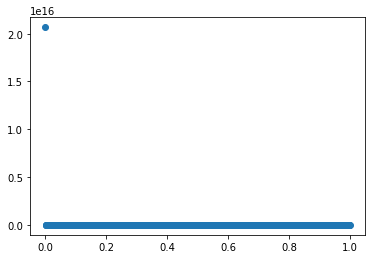

In [26]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

# Train the selected regularized model

In [27]:
rr = Ridge(alpha=0.011)
model = rr.fit(Xnew,Y)

In [28]:
model

Ridge(alpha=0.011)

In [29]:
Xnew.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

# Prepare test data

In [30]:
xtest = preprocessing(test)

In [31]:
Xnew.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

In [32]:
r = ['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

In [33]:
for i in  r:
    xtest[i] = 0

In [34]:
xfinal = xtest[Xnew.columns]

In [35]:
pred_final = model.predict(xfinal)

In [36]:
final_sub = test[["Id"]]
final_sub[["SalePrice"]]= model.predict(xfinal)

In [37]:
final_sub

,Id,SalePrice
0,1461,116568.477475
1,1462,155365.524491
2,1463,193317.746596
3,1464,200669.835028
4,1465,203104.928905
...,...,...
1454,2915,81719.069353
1455,2916,77474.675248
1456,2917,187699.370554
1457,2918,115518.451966
